In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from astropy.io import fits
from matplotlib import cm

In [2]:
with open('/Users/natachaupra/Desktop/Snr_Prj/Snr-Prj-Actual/wyle0112-hS_N_.txt','r') as data :
    sample = data.read()
    
data.close()

In [3]:
drpall_list = fits.open("/Users/natachaupra/Desktop/Snr_Prj/Snr-Prj-Actual/platelist-v2_4_3.fits")

In [4]:
table_data = StringIO(sample)

In [5]:
# convert txt to csv and make dataframe
df = pd.read_csv(table_data, sep=',')

In [6]:
df

,mangaid,ra,dec,nsa_z,frac_spx,flag1,flag2
0,1-113521,317.38870,11.502920,0.135043,0.084025,False,0
1,1-113675,318.77560,10.098460,0.129881,0.146067,False,0
2,1-121532,118.09110,34.326570,0.139965,0.368421,True,4
3,1-121737,118.29130,35.932520,0.113369,1.055877,False,0
4,1-149270,168.30090,50.264590,0.115761,0.997324,False,0
5,1-156039,143.94070,49.023210,0.114699,1.033171,False,0
6,1-156158,144.47600,50.989100,0.138619,0.157040,False,0
7,1-167519,153.91470,44.656870,0.112397,0.644802,False,0
8,1-173904,166.15800,49.675790,0.114195,1.051478,False,0
9,1-180298,322.25310,0.182614,0.133437,0.005000,False,0


In [7]:
mangaid = np.array(df[[df.columns[0]]])

In [8]:
mangaid.flatten();
len(mangaid)

45

In [9]:
objlist = drpall_list[2].data

In [10]:
# Compare mangaid to from drp with sample list to get plateifu 

plateifu = {}
lst = []
for i in range(len(objlist)):
    if objlist[i][3] in mangaid:
        if objlist[i][3] in plateifu:
            plateifu[objlist[i][3]].append(objlist[i][2])
        else:
            plateifu[objlist[i][3]] = [objlist[i][2]]

In [124]:
plateifu['1-22948']

# And there are no more duplicates --> What a win !

['7992-9102']

#### To read the flux density and plot the graph

In [138]:
def fluxReader(plateifu_id):
    data = filename(plateifu_id)
    flux = np.transpose(data['FLUX'].data, axes = (2, 1, 0))
    wave = data['WAVE'].data
    return (flux, wave)

In [139]:
def fluxGenerator(plateifu_id, mangaid):
    flux = fluxReader(plateifu_id)[0]
    wave = fluxReader(plateifu_id)[1]
    n = len(flux[0])
    sumflux = [0.]*4563
    
    for i in range(n):
        for j in range(n):
            sumflux = [sum(x) for x in zip(sumflux,flux[i][j])]
            
    plt.figure(figsize = (10,5))
    plt.grid()
    plt.xlabel('Observed Wavelength ' + r'($\AA$)')
    plt.ylabel('Flux Density (1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$)')
    plt.ylim(0,700)
    plt.xlim(4500, 5500)
    plt.axvline(5007, color = 'mediumseagreen', linewidth = 3, label = '5007')
    plt.axvline(4959, color = 'deepskyblue', linewidth = 3, label = '4959')
    plt.legend()
    plt.title('MaNGA ID = ' + mangaid)
    plt.plot(wave, sumflux, color = 'darkmagenta')

#### To read all data and plot 2d images

In [12]:
def filename(plateifu_id):
    objname = 'manga-'+plateifu_id+'-LOGCUBE.fits.gz'
    name = '/Volumes/WD_External/MaNGA_Sample_with_[OIII]/'+ objname
    filedata = fits.open(name)
    return filedata

In [110]:
def dataReader(plateifu_id):
    data = filename(plateifu_id)
    flux = np.transpose(data['FLUX'].data, axes = (2, 1, 0))
    mask = np.transpose(data['MASK'].data, axes=(2, 1, 0))
    wave = data['WAVE'].data
    flux_header  = data['FLUX'].header
    return (flux, mask, wave, flux_header)

In [111]:
def imageGenerator(plateifu_id, mangaID, redshift):
    flux = dataReader(plateifu_id)[0]
    mask = dataReader(plateifu_id)[1]
    wave = dataReader(plateifu_id)[2]
    flux_header = dataReader(plateifu_id)[3]
    
    x_center = int(flux_header['CRPIX1']) - 1
    y_center = int(flux_header['CRPIX2']) - 1

    do_not_use = (mask & 2**10) != 0
    flux_m = np.ma.array(flux, mask=do_not_use)

    redshift = 0.131681
    ind_wave = np.where((wave / (1 + redshift) > 4900) & (wave / (1 + redshift) < 5100))[0]
    halpha = flux_m[:, :, ind_wave].sum(axis=2)
    im = halpha.T

    # Convert from array indices to arcsec relative to IFU center
    dx = flux_header['CD1_1'] * 3600.  # deg to arcsec
    dy = flux_header['CD2_2'] * 3600.  # deg to arcsec

    dimension = [0, len(flux[0]), 0, len(flux)]
    
    plt.figure(figsize = (5,5))
    plt.imshow(im, extent=dimension, cmap=cm.YlGnBu_r, vmin=0.1, vmax=100, origin='lower', interpolation='none')
    plt.xlabel('pixels')
    plt.ylabel('pixels')
    plt.title('MaNGA ID = ' + mangaID)
    plt.colorbar(label = '1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$')
    plt.plot()
#     plt.savefig('Images/demo_2d_13')

CPU times: user 8 s, sys: 97 ms, total: 8.1 s
Wall time: 8.1 s


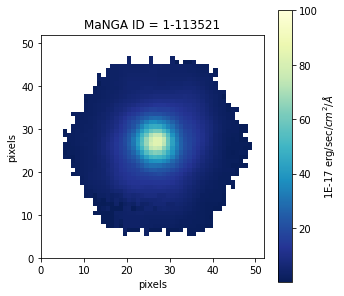

In [117]:
%%time
num = 0
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

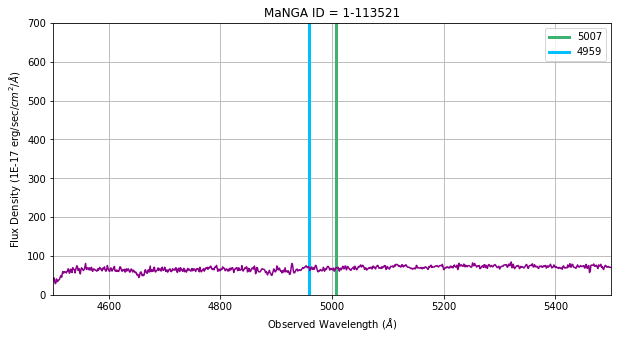

In [140]:
num = 0
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

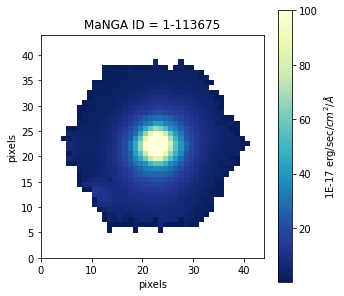

In [44]:
num = 1
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

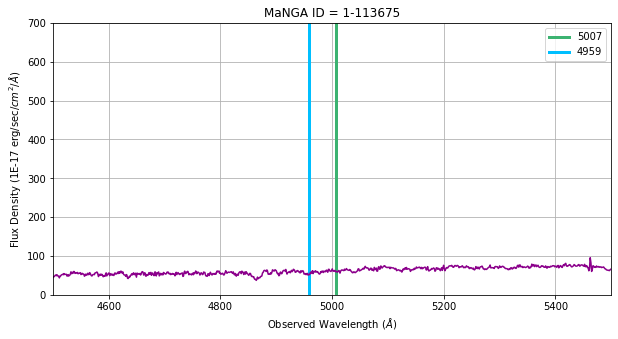

In [141]:
num = 1
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

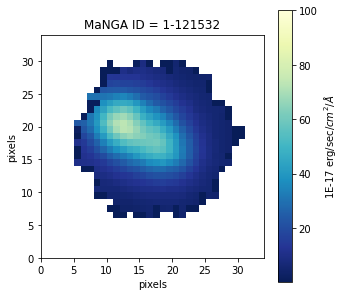

In [45]:
num = 2
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

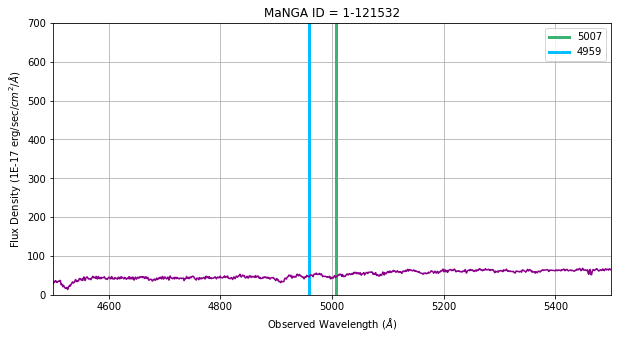

In [142]:
num = 2
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

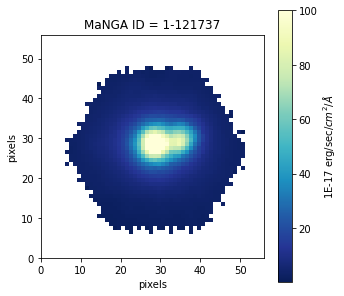

In [46]:
num = 3
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

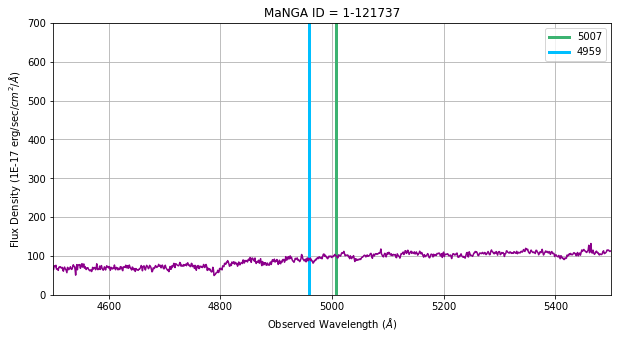

In [143]:
num = 3
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

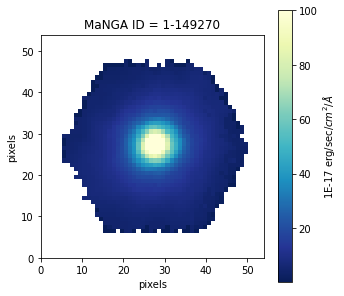

In [47]:
num = 4
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

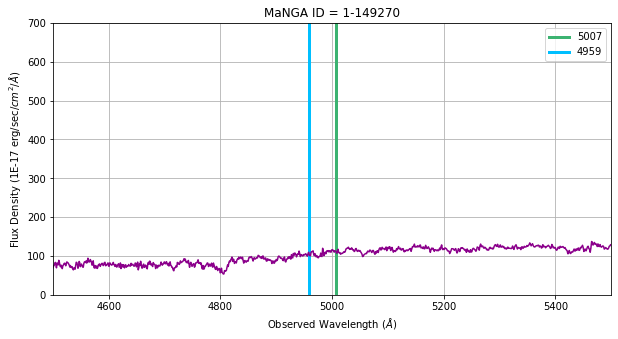

In [144]:
num = 4
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

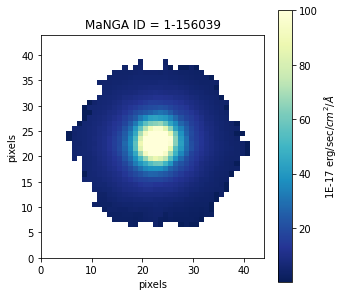

In [48]:
num = 5
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

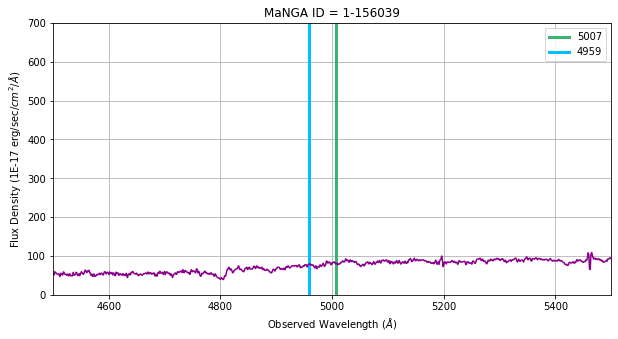

In [145]:
num = 5
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

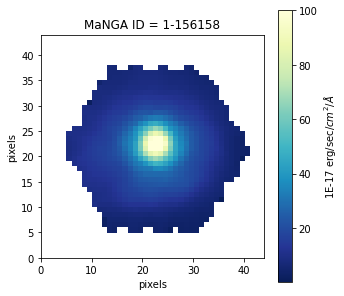

In [49]:
num = 6
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

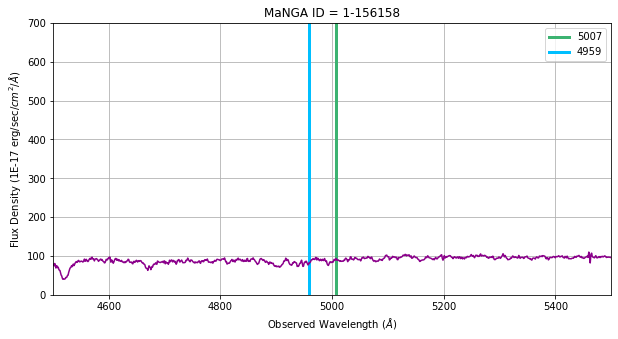

In [146]:
num = 6
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

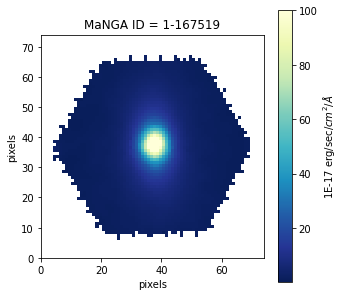

In [50]:
num = 7
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

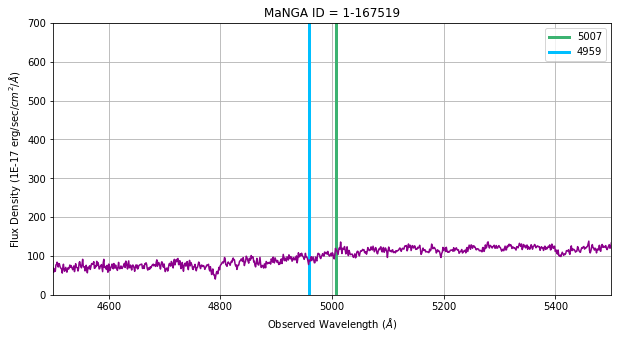

In [147]:
num = 7
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

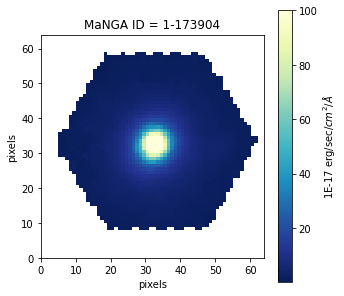

In [51]:
num = 8
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

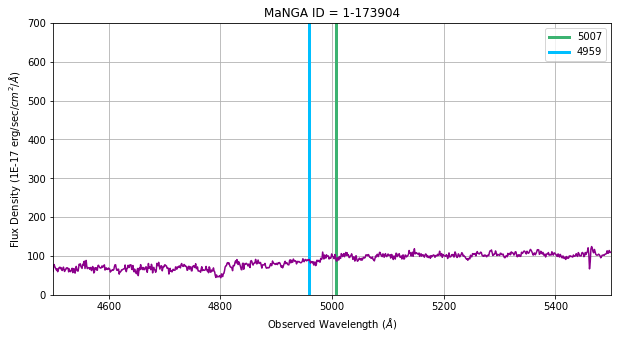

In [148]:
num = 8
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

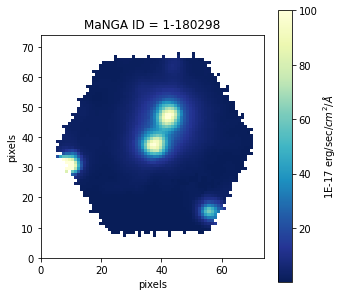

In [52]:
num = 9
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

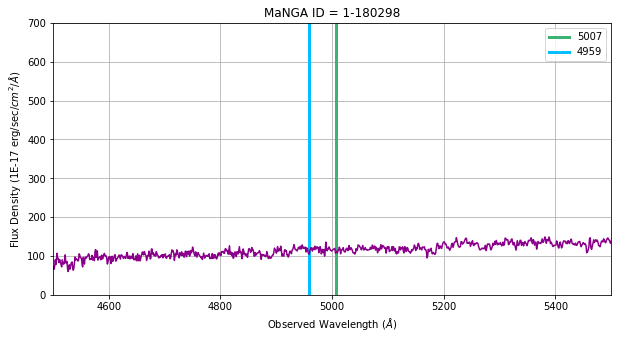

In [149]:
num = 9
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

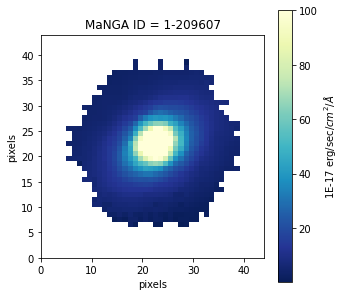

In [53]:
num = 10
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

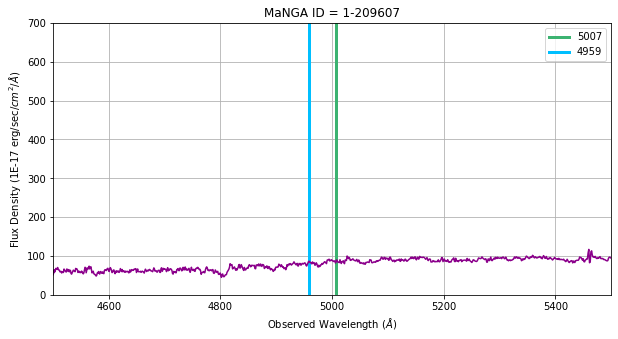

In [150]:
num = 10
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

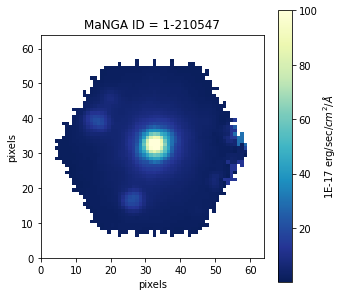

In [54]:
num = 11
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

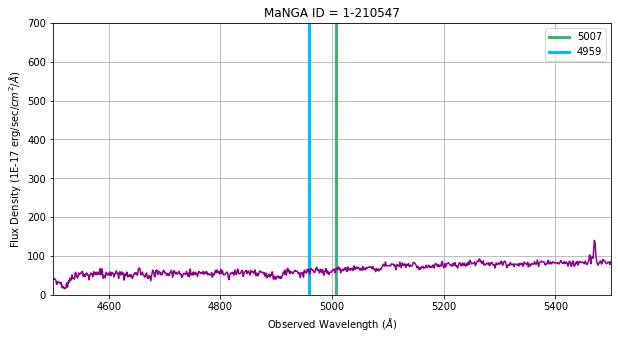

In [151]:
num = 11
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

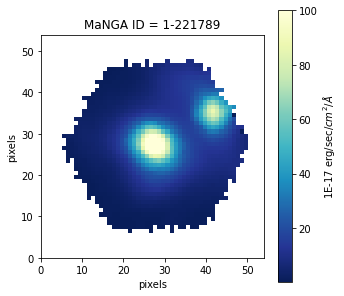

In [55]:
num = 12
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

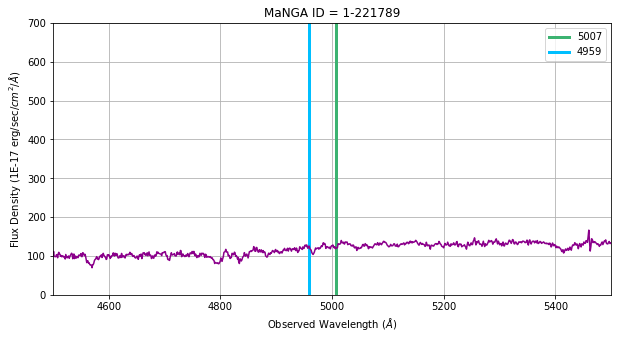

In [152]:
num = 12
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

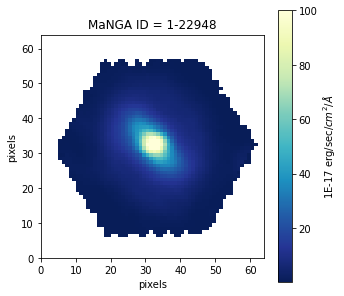

In [56]:
num = 13
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

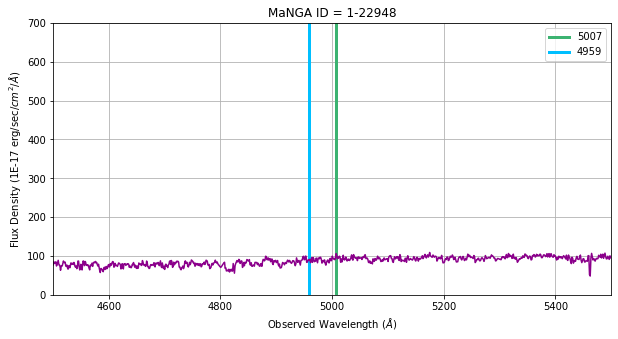

In [153]:
num = 13
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

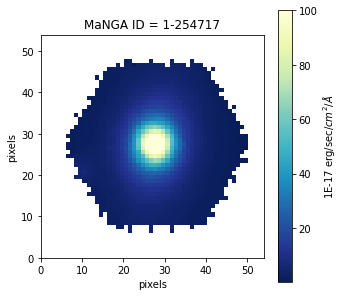

In [57]:
num = 14
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

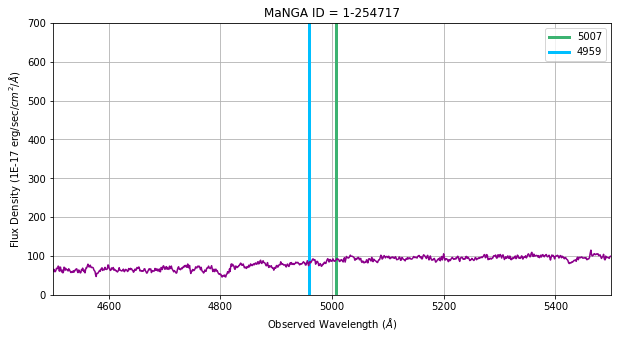

In [154]:
num = 14
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

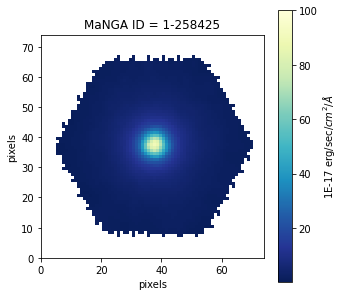

In [58]:
num = 15
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

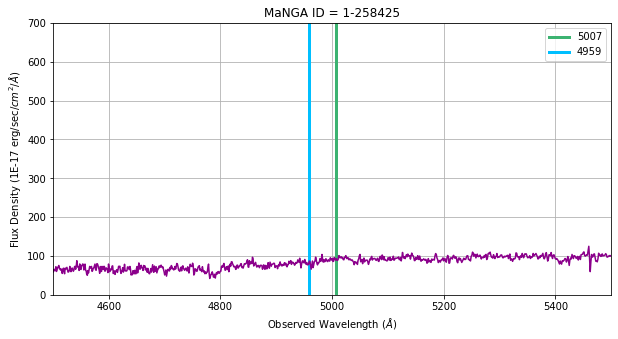

In [155]:
num = 15
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

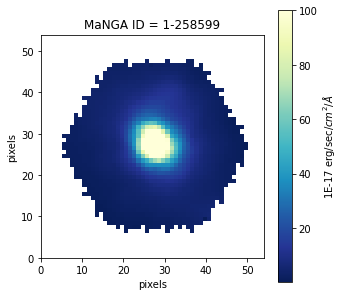

In [59]:
num = 16
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

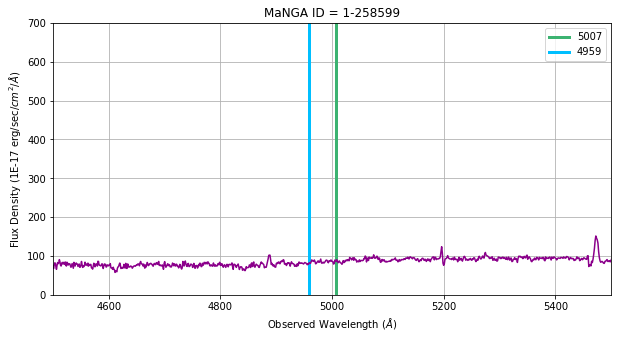

In [156]:
num = 16
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

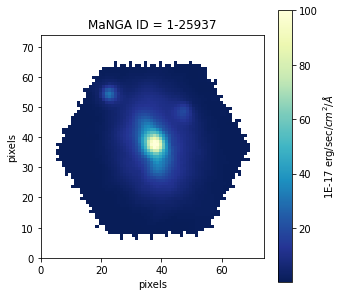

In [60]:
num = 17
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

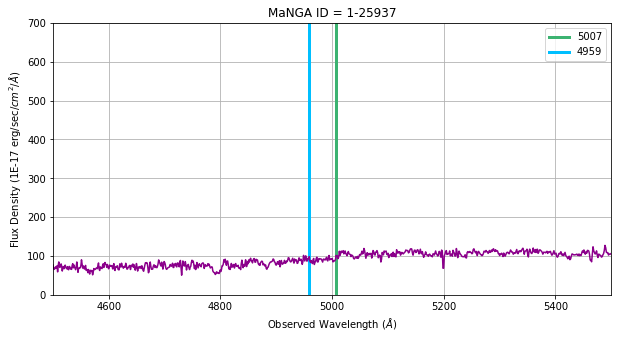

In [157]:
num = 17
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

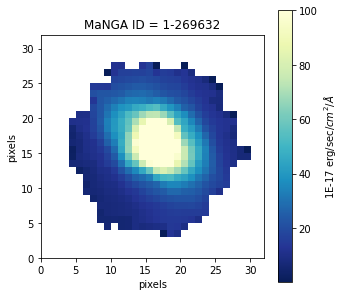

In [61]:
num = 18
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

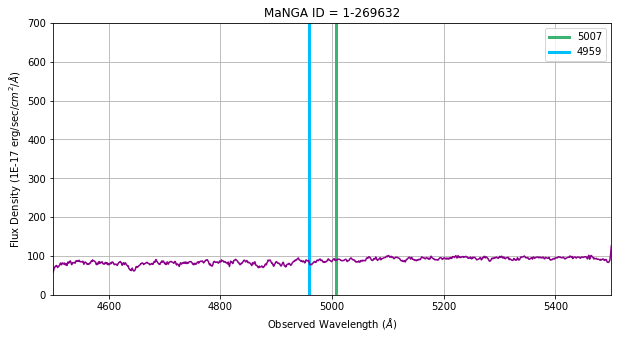

In [158]:
num = 18
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

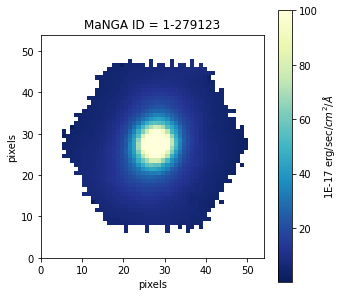

In [62]:
num = 19
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

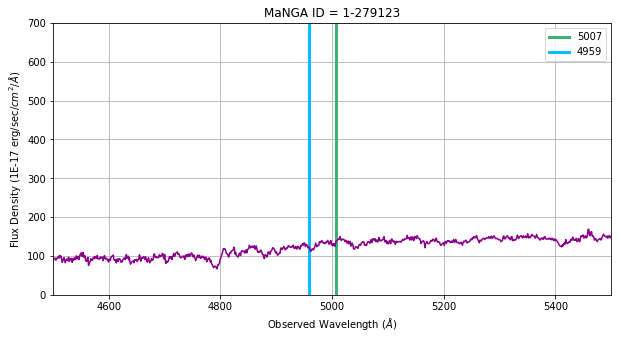

In [159]:
num = 19
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

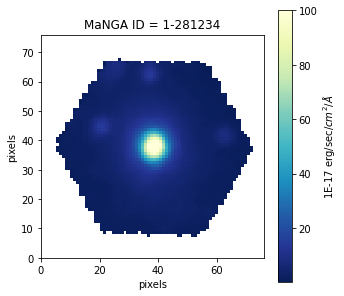

In [63]:
num = 20
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

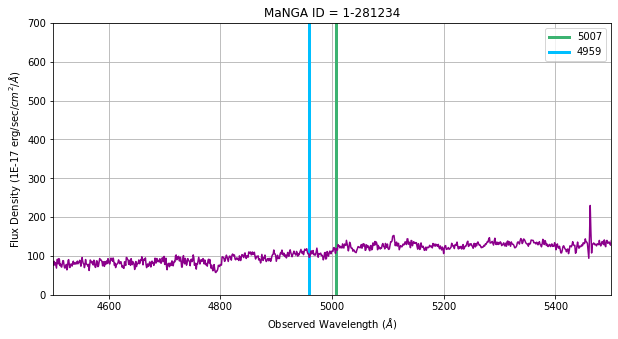

In [160]:
num = 20
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

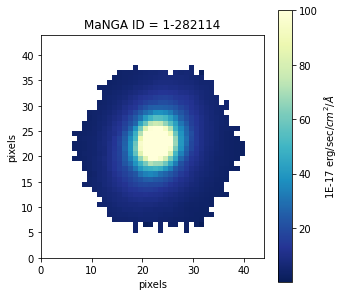

In [64]:
num = 21
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

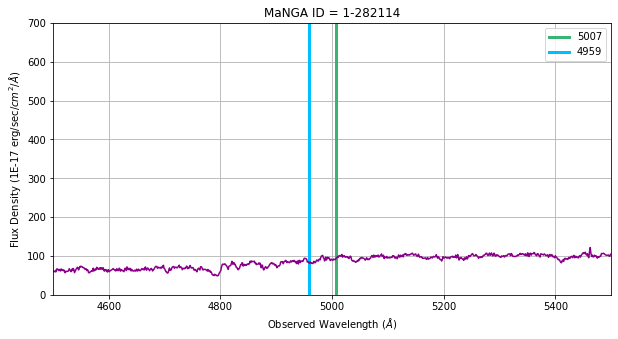

In [161]:
num = 21
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

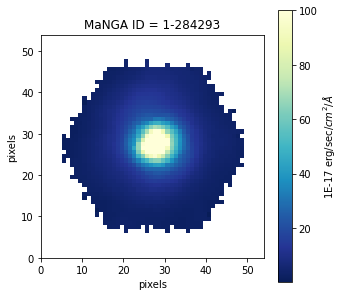

In [65]:
num = 22
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

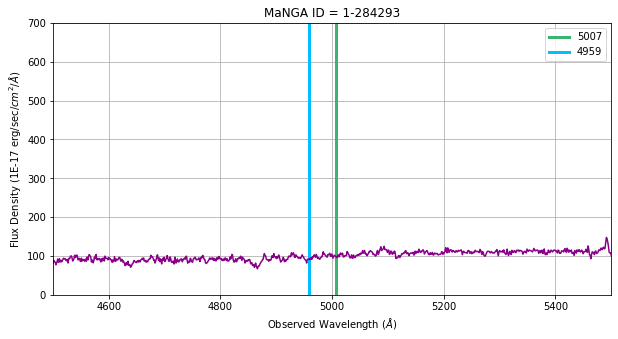

In [162]:
num = 22
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

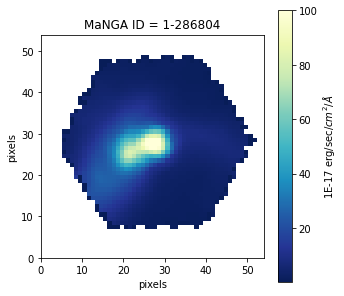

In [66]:
num = 23
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

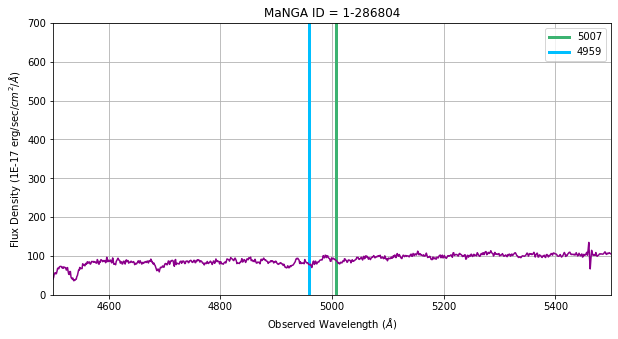

In [163]:
num = 23
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

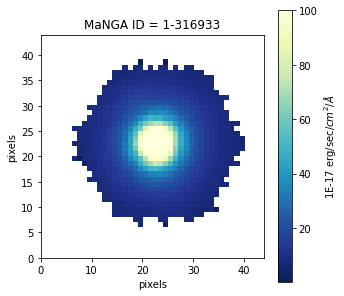

In [67]:
num = 24
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

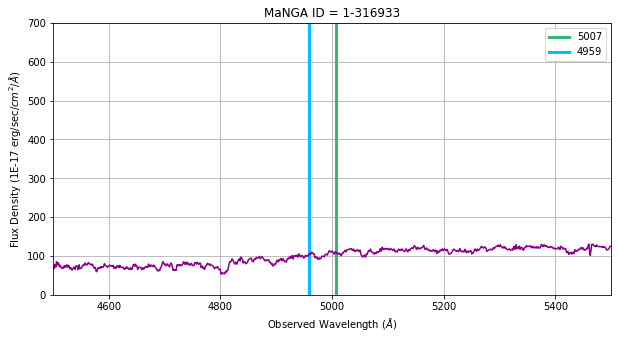

In [164]:
num = 24
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

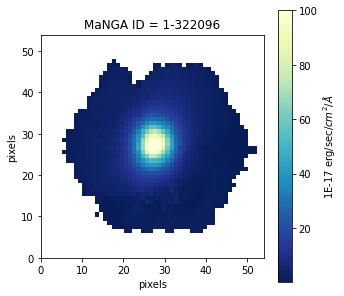

In [68]:
num = 25
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

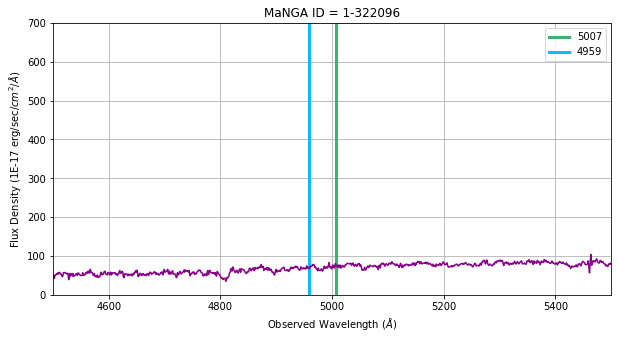

In [165]:
num = 25
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

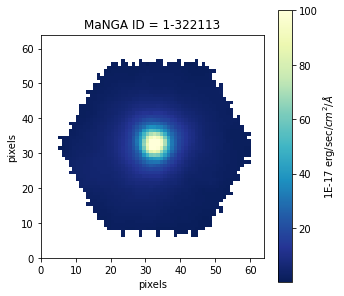

In [69]:
num = 26
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

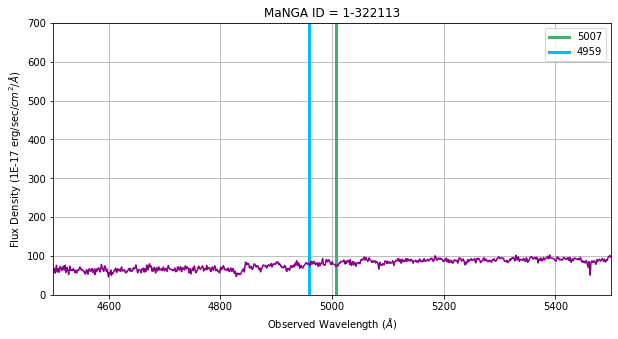

In [166]:
num = 26
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

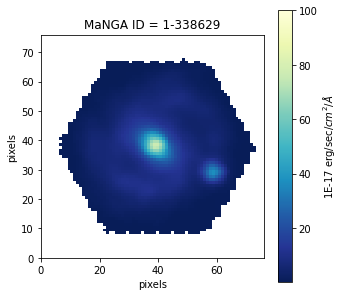

In [70]:
num = 27
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

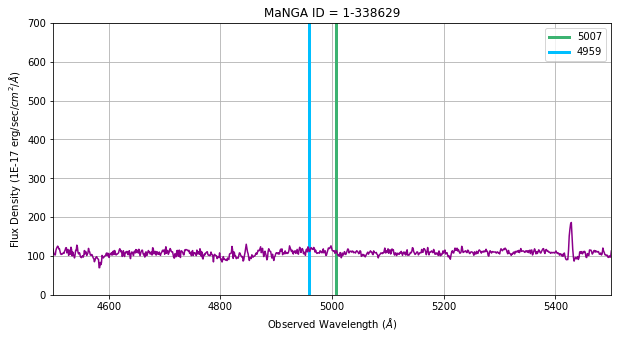

In [167]:
num = 27
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

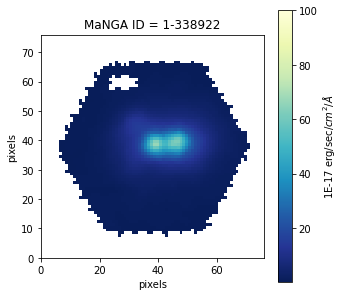

In [71]:
num = 28
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

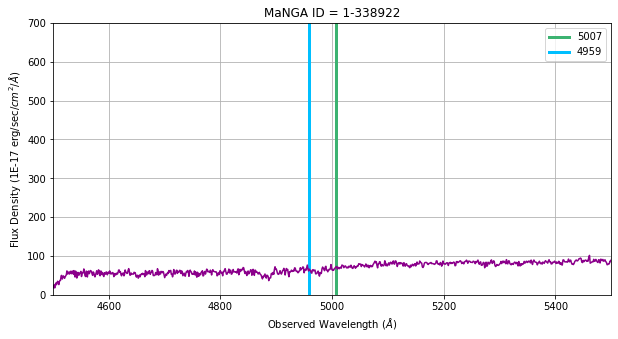

In [168]:
num = 28
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

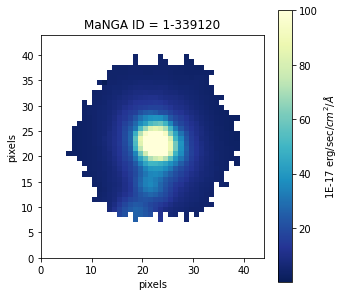

In [72]:
num = 29
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

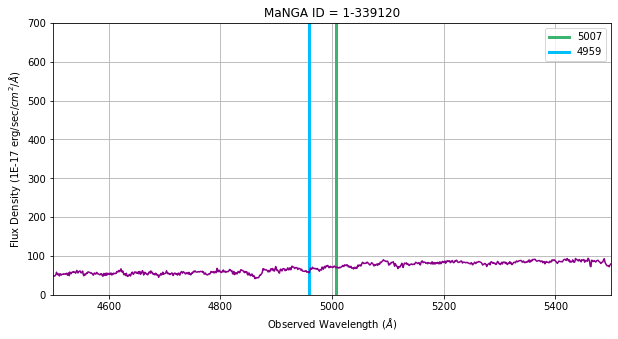

In [169]:
num = 29
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

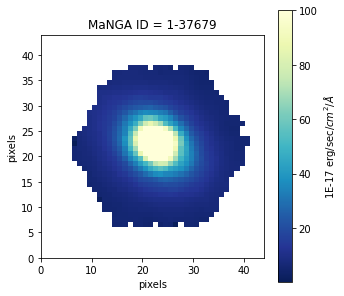

In [73]:
num = 30
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

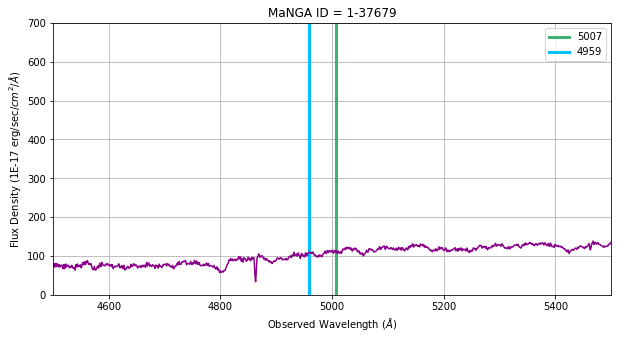

In [170]:
num = 30
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

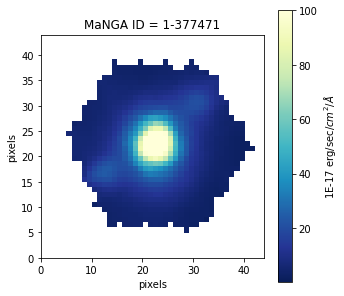

In [74]:
num = 31
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

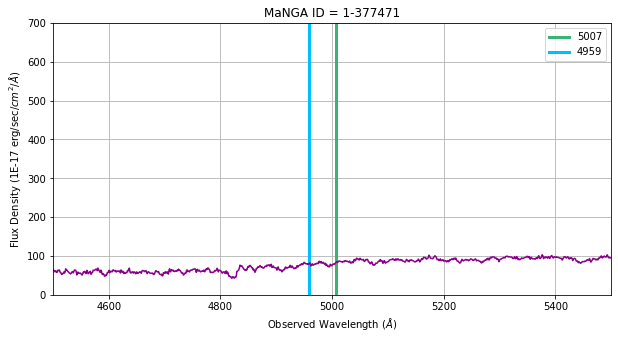

In [171]:
num = 31
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

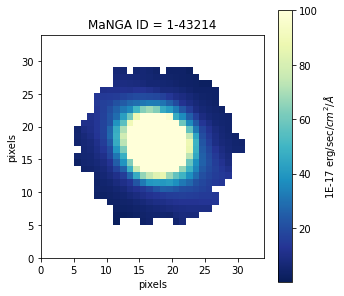

In [75]:
num = 32
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

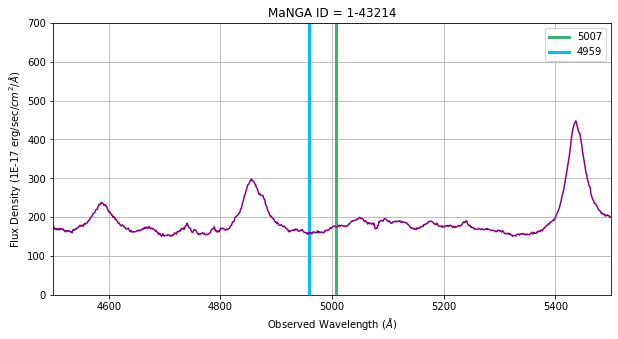

In [183]:
num = 32
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

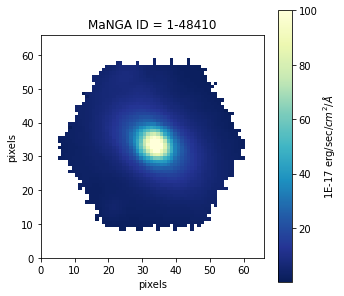

In [76]:
num = 33
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

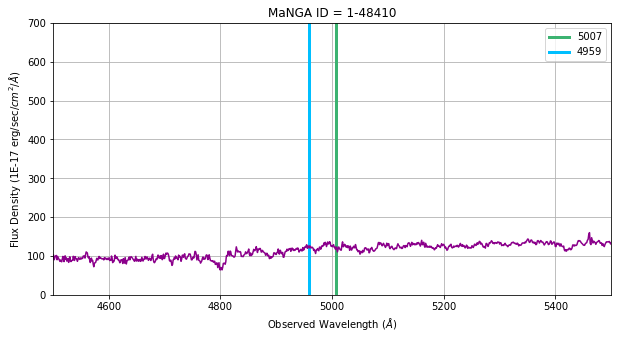

In [184]:
num = 33
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

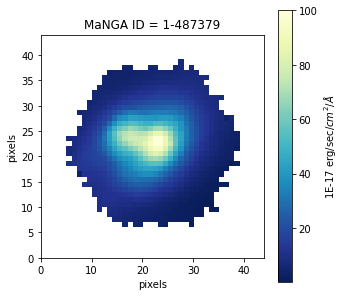

In [77]:
num = 34
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

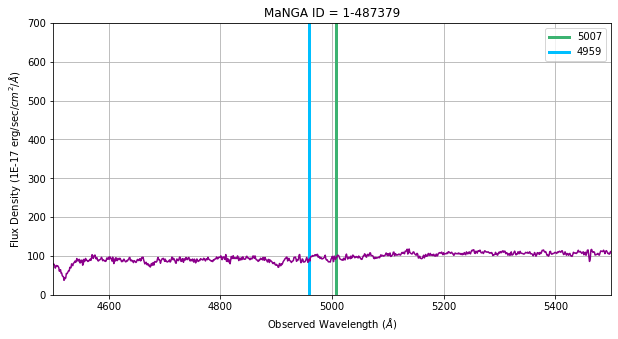

In [185]:
num = 34
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

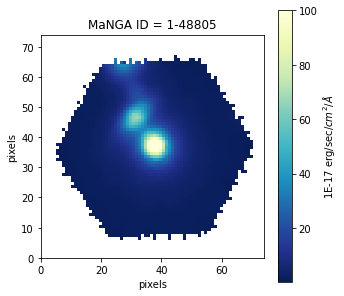

In [78]:
num = 35
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

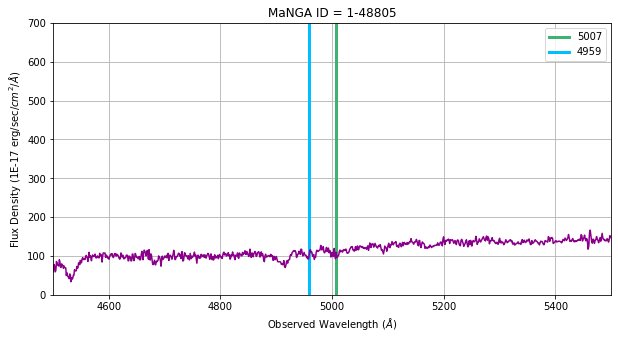

In [186]:
num = 35
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

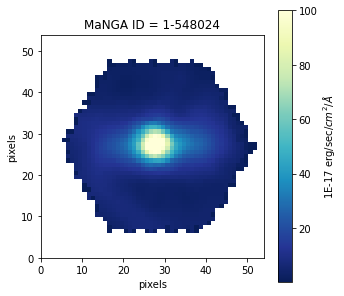

In [79]:
num = 36
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

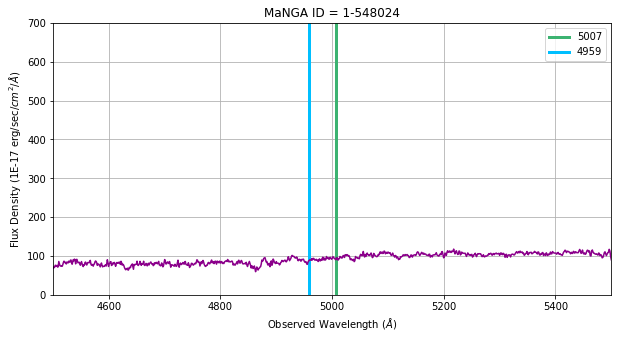

In [187]:
num = 36
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

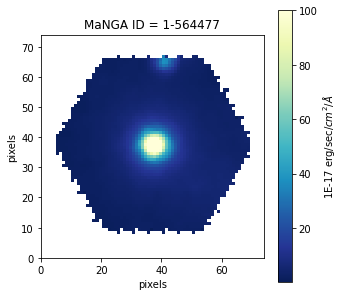

In [80]:
num = 37
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

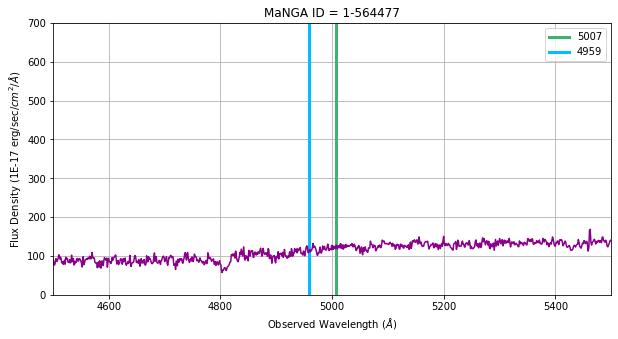

In [188]:
num = 37
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

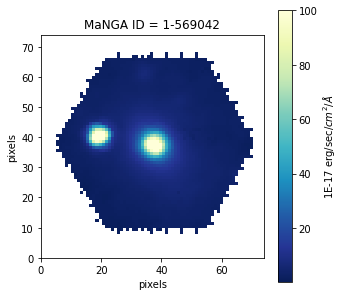

In [81]:
num = 38
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

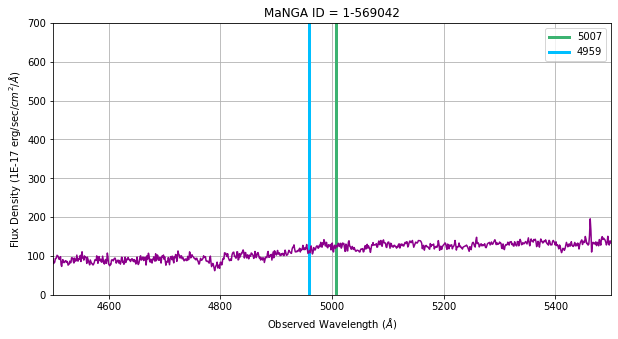

In [189]:
num = 38
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

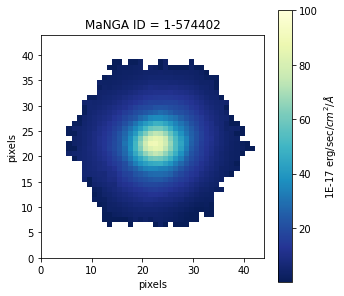

In [82]:
num = 39
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

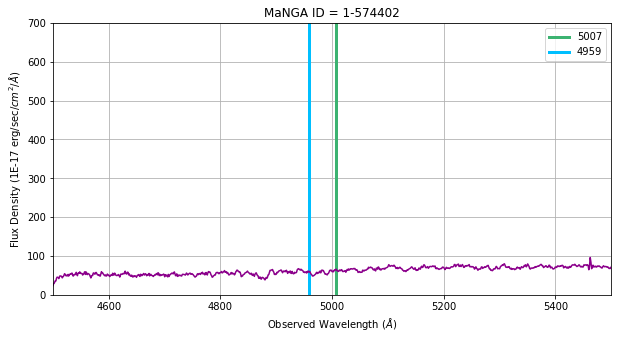

In [190]:
num = 39
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

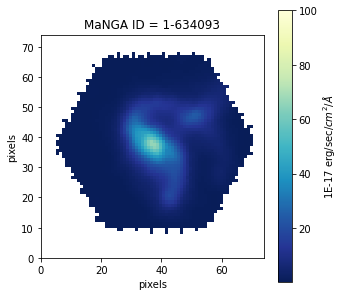

In [83]:
num = 40
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

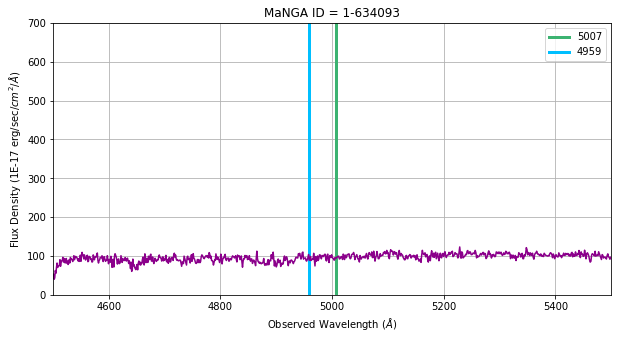

In [191]:
num = 40
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

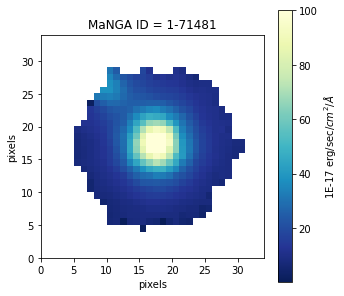

In [84]:
num = 41
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

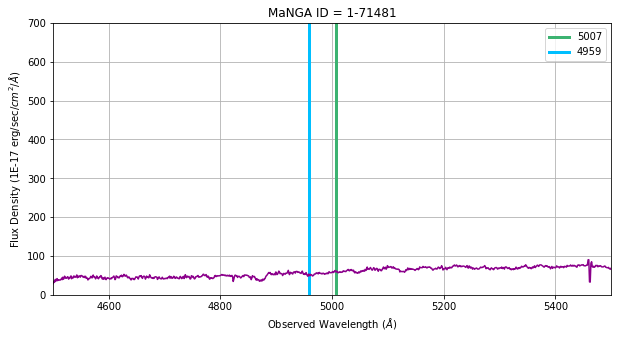

In [192]:
num = 41
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

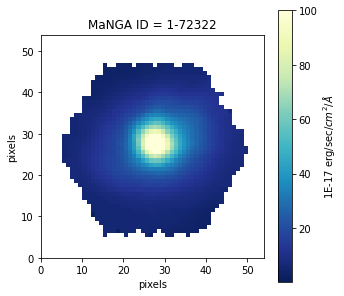

In [85]:
num = 42
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

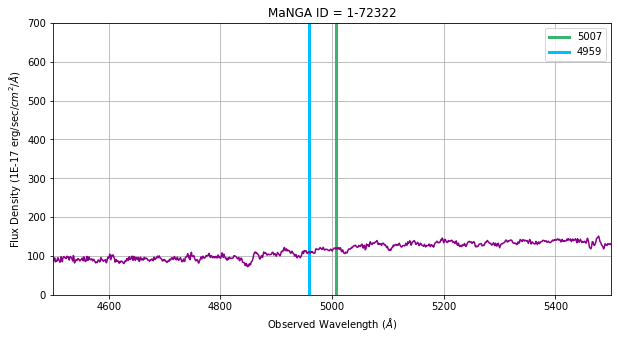

In [193]:
num = 42
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

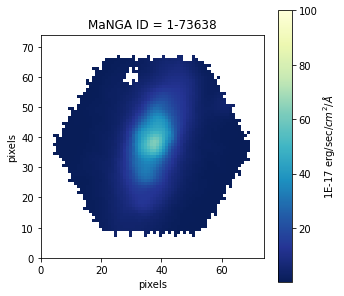

In [86]:
num = 43
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

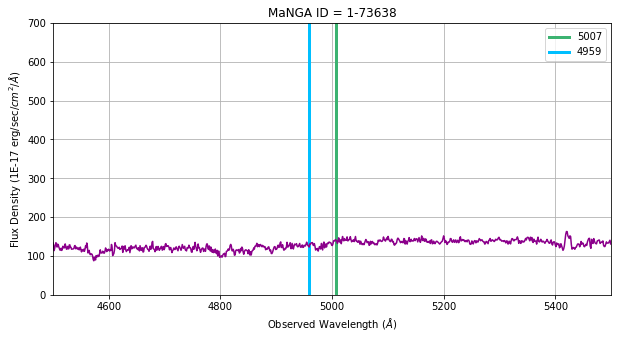

In [194]:
num = 43
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

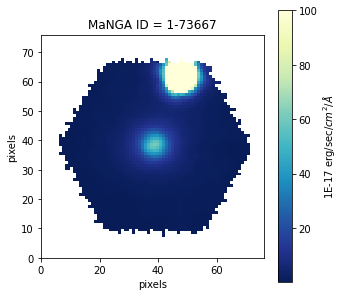

In [87]:
num = 44
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

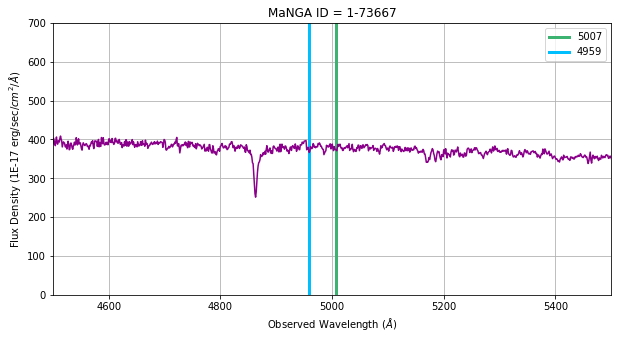

In [195]:
num = 44
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num])

In [88]:
plateifu['1-22948']

['7992-9102']

In [172]:
num13 = fits.open('/Volumes/WD_External/MaNGA_Sample_with_[OIII]/manga-7992-9102-LOGCUBE.fits.gz')

In [173]:
# num13[0].header

In [174]:
wave13 = num13['WAVE'].data

In [175]:
flux13 = np.transpose(num13['FLUX'].data, axes=(2, 1, 0))

32 32


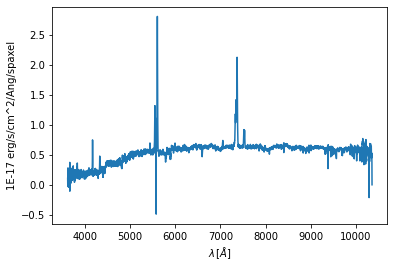

In [180]:
flux_header13 = num13['FLUX'].header

x_center13 = int(flux_header13['CRPIX1']) - 1
y_center13 = int(flux_header13['CRPIX2']) - 1
print(x_center13, y_center13)

plt.plot(wave13, flux13[x_center13, y_center13])
plt.xlabel('$\lambda \, [\AA]$')
plt.ylabel(flux_header13['BUNIT'])
plt.show()

In [182]:
len(flux13[x_center13, y_center13])

4563

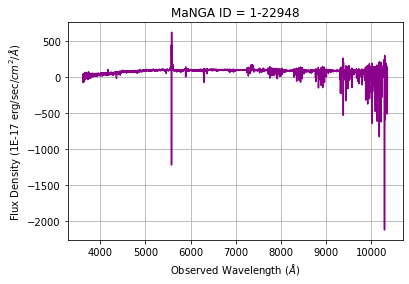

In [179]:
# plt.figure(figsize = (10,5))
plt.grid()
plt.xlabel('Observed Wavelength ' + r'($\AA$)')
plt.ylabel('Flux Density (1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$)')
# plt.ylim(0,700)
# plt.xlim(6500,6600)
# plt.vlines(x=[5550,5600], ymin = min(sumflux), ymax = max(sumflux), linewidth = 3)
# plt.vlines(x=[4840,4880], ymin = min(sumflux), ymax = max(sumflux), color = 'orange', linewidth = 3)
# plt.axvline(5007, color = 'mediumseagreen', linewidth = 3)
plt.title('MaNGA ID = 1-22948')
plt.plot(wave13, sumflux, color = 'darkmagenta')
# plt.savefig('Screenshots_/Demo_flux_density', bbox_inches= "tight")

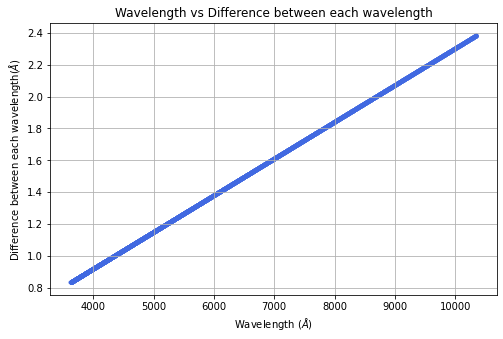

In [92]:
difference = [] 
for i in range(1, len(wave13)):
    difference.append(wave13[i] - wave13[i-1])
# len(difference)
plt.figure(figsize = (8,5))
plt.grid()
plt.xlabel("Wavelength " + r'($\AA$)')
plt.ylabel('Difference between each wavelength' + r'($\AA$)')
plt.title("Wavelength vs Difference between each wavelength")
plt.scatter(wave13[:-1], difference, marker = '.', color = 'royalblue')
# plt.savefig('Images/wavelength_vs_difference')

In [94]:
# n = len(flux13[0])
# sumflux = [0.]*(4563)

# for i in range(n):
#     for j in range(n):
#         sumflux = [sum(x) for x in zip(sumflux,flux13[i][j])]

In [97]:
# wave13_emitted = wave13/(1+0.119399)

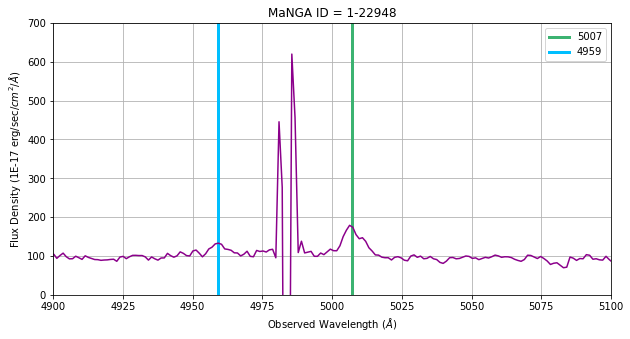

In [100]:
# plt.figure(figsize = (10,5))
# plt.grid()
# plt.xlabel('Observed Wavelength ' + r'($\AA$)')
# plt.ylabel('Flux Density (1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$)')
# plt.ylim(0,700)
# plt.xlim(4900,5100)
# # plt.vlines(x=[5550,5600], ymin = min(sumflux), ymax = max(sumflux), linewidth = 3)
# # plt.vlines(x=[4840,4880], ymin = min(sumflux), ymax = max(sumflux), color = 'orange', linewidth = 3)
# plt.axvline(5007, color = 'mediumseagreen', linewidth = 3, label = '5007')
# plt.axvline(4959, color = 'deepskyblue', linewidth = 3, label = '4959')
# plt.legend()
# plt.title('MaNGA ID = 1-22948')
# plt.plot(wave13_emitted, sumflux, color = 'darkmagenta')
# # plt.savefig('Screenshots_/Demo_flux_density', bbox_inches= "tight")